In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from persistent_cost.cylinder import cylinder_pipeline
from persistent_cost.utils.output import plot_persistence_barcodes, print_diagram, print_diagram_stats, diagram_stats


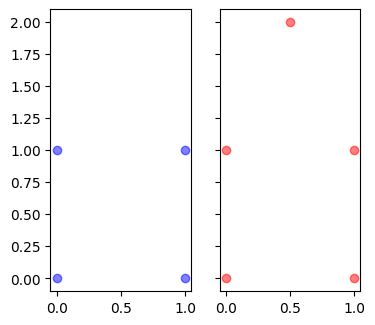

In [3]:
X = np.array([[0, 1], [1, 0], [0, 0], [1, 1]])
Y = np.array([[0, 1], [1, 0], [0, 0], [1, 1], [0.5, 2]])
f = np.array([0, 1, 2, 3])

fig, ax = plt.subplots(1,2, figsize=(4,8), sharex=True, sharey=True)
ax[0].scatter(X[:, 0], X[:, 1], color='blue', alpha = 0.5, label='X')
ax[1].scatter(Y[:, 0], Y[:, 1], color='red', alpha= 0.5, label='Y');
# equal axes
ax[0].set_aspect('equal', adjustable='box')
ax[1].set_aspect('equal', adjustable='box')

In [4]:
# Parámetros
threshold = 10.0
maxdim = 1

d_ker, d_coker = cylinder_pipeline(X, Y, f, threshold, maxdim)
print("Kernel persistence diagram:")
print_diagram_stats(d_ker)
print_diagram(d_ker)
print("Cokernel persistence diagram:")
print_diagram_stats(d_coker)
print_diagram(d_coker)


14 rows in L
89 rows not in L
8 cycle columns to process in cokernel step
Kernel persistence diagram:
Cokernel persistence diagram:
Dimension 0:
  Total points: 10
  Finite points: 5
  Infinite points: 5
  Average lifetime (finite): 0.2236
  Max lifetime (finite): 1.1180

Dimension 1:
  Total points: 42
  Finite points: 21
  Infinite points: 21
  Average lifetime (finite): 0.0000
  Max lifetime (finite): 0.0000

Dimension 0:
  (0.0, 0.0)
  (0.0, 0.0)
  (0.0, 0.0)
  (0.0, 0.0)
  (0.0, 1.118033988749895)
  (0.0, inf)
  (0.0, inf)
  (0.0, inf)
  (0.0, inf)
  (0.0, inf)
Dimension 1:
  (1.0, 1.0)
  (1.0, 1.0)
  (1.0, 1.0)
  (1.0, 1.0)
  (1.0, 1.0)
  (1.0, 1.0)
  (1.0, 1.0)
  (1.0, 1.0)
  (1.0, 1.0)
  (1.0, 1.0)
  (1.0, 1.0)
  (1.0, 1.0)
  (1.118033988749895, 1.118033988749895)
  (1.4142135623730951, 1.4142135623730951)
  (1.4142135623730951, 1.4142135623730951)
  (1.4142135623730951, 1.4142135623730951)
  (1.4142135623730951, 1.4142135623730951)
  (1.4142135623730951, 1.4142135623730951)
  

/home/miles/miniconda3/lib/python3.12/site-packages/scipy/sparse/_index.py:142: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray_sparse(i, j, x)


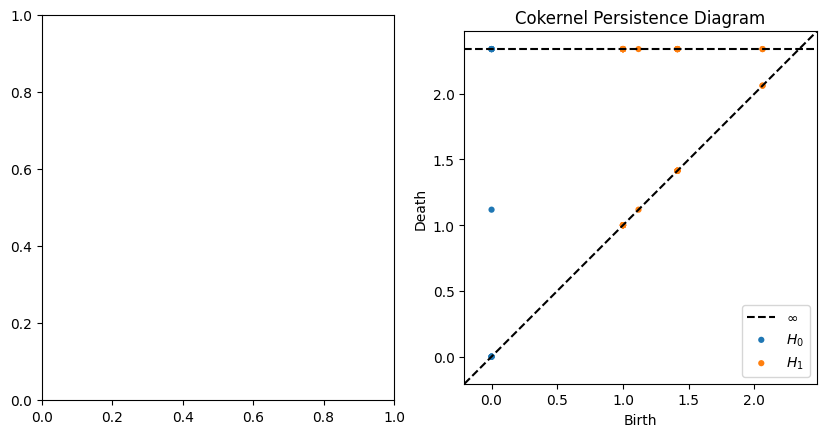

In [5]:
from persim import plot_diagrams
dgm_ker = [np.array(x) for x in d_ker.values()]
dgm_coker = [np.array(x) for x in d_coker.values()]
fig, ax = plt.subplots(1,2, figsize=(10,5))
if not all([len(d)==0 for d in dgm_ker]): plot_diagrams(dgm_ker,ax=ax[0], title="Kernel Persistence Diagram")
if not all([len(d)==0 for d in dgm_coker]): plot_diagrams(dgm_coker,ax=ax[1], title="Cokernel Persistence Diagram")

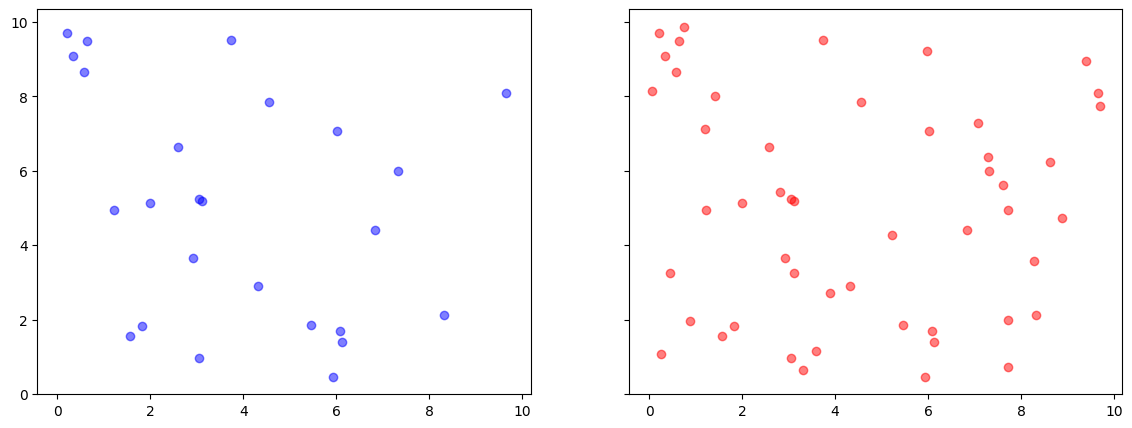

In [6]:
# Random 50 points cloud X, Y, f range(25)
np.random.seed(42)
Y = np.random.rand(50, 2) * 10
X = Y[:25]
f = np.arange(25)


fig, ax = plt.subplots(1,2, figsize=(14,5), sharex=True, sharey=True)
ax[0].scatter(X[:, 0], X[:, 1], color='blue', alpha = 0.5, label='X')
ax[1].scatter(Y[:, 0], Y[:, 1], color='red', alpha= 0.5, label='Y');

31 rows in L
222 rows not in L
28 cycle columns to process in cokernel step
Kernel persistence diagram:
Dimension 1:
  Total points: 14
  Finite points: 0
  Infinite points: 14
  Average lifetime (finite): nan
  Max lifetime (finite): nan

Cokernel persistence diagram:
Dimension 0:
  Total points: 82
  Finite points: 32
  Infinite points: 50
  Average lifetime (finite): 0.2933
  Max lifetime (finite): 0.9424

Dimension 1:
  Total points: 91
  Finite points: 45
  Infinite points: 46
  Average lifetime (finite): 0.0000
  Max lifetime (finite): 0.0000



/home/miles/miniconda3/lib/python3.12/site-packages/scipy/sparse/_index.py:142: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray_sparse(i, j, x)


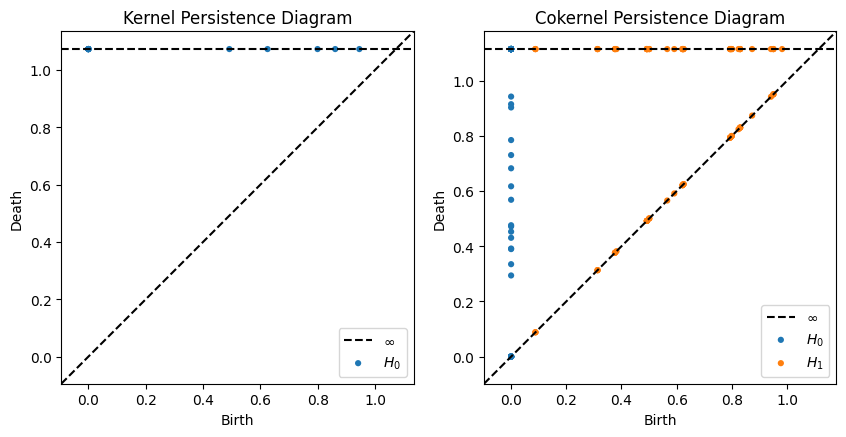

In [7]:


threshold = 1
d_ker, d_coker = cylinder_pipeline(X, Y, f, threshold, maxdim, verbose=False)

print("Kernel persistence diagram:")
print_diagram_stats(d_ker)
# print_diagram(d_ker)
print("Cokernel persistence diagram:")
print_diagram_stats(d_coker)
# print_diagram(d_coker)

dgm_ker = [np.array(x) if np.size(x) > 0 else np.zeros((1, 2)) for x in d_ker.values()]
dgm_coker = [np.array(x) if np.size(x) > 0 else np.zeros((1, 2)) for x in d_coker.values()]
fig, ax = plt.subplots(1,2, figsize=(10,5))
# print("dgm_ker:", dgm_ker)
plot_diagrams(dgm_ker,ax=ax[0], title="Kernel Persistence Diagram")
plot_diagrams(dgm_coker,ax=ax[1], title="Cokernel Persistence Diagram")

In [8]:
import pandas as pd
from scipy.spatial.distance import pdist
from tqdm import tqdm
np.random.seed(42)
Y = np.random.rand(50, 2) * 10
threshold = max(pdist(Y).flatten()) # max distance
maxdim = 1
stats = []
for n in tqdm([10, 20, 30, 40, 50]):
    X = Y[:n]
    f = np.arange(n)

    d_ker, d_coker = cylinder_pipeline(X, Y, f, threshold, maxdim, verbose=False)

    # bars statistics, number of bars per dim, average length, max length
    stats_ker = diagram_stats(d_ker)
    df_ker = pd.DataFrame(stats_ker)
    df_ker["inclusion_size"] = n
    df_ker["case"] = "kernel"
    stats_coker = diagram_stats(d_coker)
    df_coker = pd.DataFrame(stats_coker)
    df_coker["inclusion_size"] = n
    df_coker["case"] = "cokernel"

    stats.append(df_ker)
    stats.append(df_coker)
df_stats = pd.concat(stats)
df_stats = df_stats.set_index(["inclusion_size", "case", "dimension"]).sort_index()

  0%|          | 0/5 [00:00<?, ?it/s]

106 rows in L
21944 rows not in L
130 cycle columns to process in cokernel step


/home/miles/miniconda3/lib/python3.12/site-packages/scipy/sparse/_index.py:142: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray_sparse(i, j, x)
 20%|██        | 1/5 [00:04<00:16,  4.17s/it]

453 rows in L
29772 rows not in L
1160 cycle columns to process in cokernel step


/home/miles/miniconda3/lib/python3.12/site-packages/scipy/sparse/_index.py:142: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray_sparse(i, j, x)
 40%|████      | 2/5 [00:11<00:17,  5.78s/it]

1309 rows in L
51091 rows not in L
4090 cycle columns to process in cokernel step


/home/miles/miniconda3/lib/python3.12/site-packages/scipy/sparse/_index.py:142: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray_sparse(i, j, x)
 60%|██████    | 3/5 [00:28<00:22, 11.13s/it]

3156 rows in L
92419 rows not in L
9920 cycle columns to process in cokernel step


/home/miles/miniconda3/lib/python3.12/site-packages/scipy/sparse/_index.py:142: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray_sparse(i, j, x)
 80%|████████  | 4/5 [01:20<00:27, 27.23s/it]

5248 rows in L
161502 rows not in L
19650 cycle columns to process in cokernel step


/home/miles/miniconda3/lib/python3.12/site-packages/scipy/sparse/_index.py:142: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray_sparse(i, j, x)
100%|██████████| 5/5 [03:49<00:00, 45.89s/it]


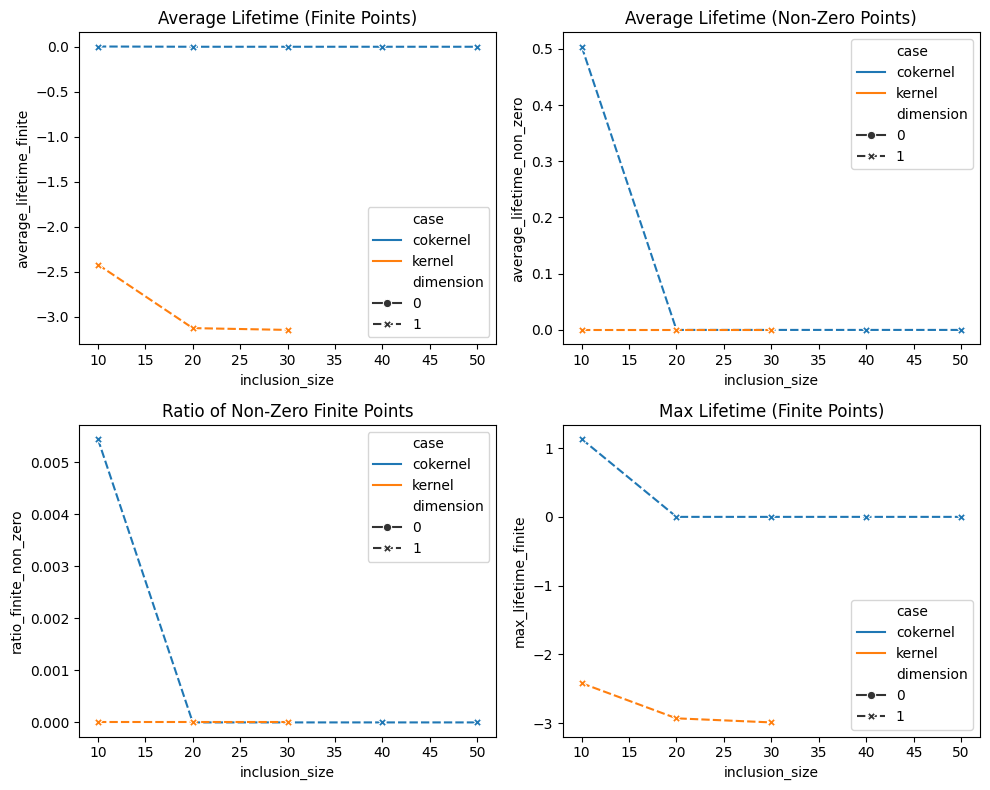

In [12]:
# seaborn lineplots
import seaborn as sns

fig, ax = plt.subplots(2, 2, figsize=(10, 8))
sns.lineplot(data=df_stats.reset_index(), x="inclusion_size", y="average_lifetime_finite",
             hue="case", style="dimension", markers=True, ax=ax[0, 0])
sns.lineplot(data=df_stats.reset_index(), x="inclusion_size", y="average_lifetime_non_zero",
             hue="case", style="dimension", markers=True, ax=ax[0, 1])
sns.lineplot(data=df_stats.reset_index(), x="inclusion_size", y="ratio_finite_non_zero",
             hue="case", style="dimension", markers=True, ax=ax[1, 0])
sns.lineplot(data=df_stats.reset_index(), x="inclusion_size", y="max_lifetime_finite",
             hue="case", style="dimension", markers=True, ax=ax[1, 1])
ax[0, 0].set_title("Average Lifetime (Finite Points)")
ax[0, 1].set_title("Average Lifetime (Non-Zero Points)")
ax[1, 0].set_title("Ratio of Non-Zero Finite Points")
ax[1, 1].set_title("Max Lifetime (Finite Points)")
plt.tight_layout()
plt.show()